In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic = pd.read_csv('dictionary.csv')


In [67]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [68]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [69]:
dic.head(3)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


# Merging and Concating the dataframes

 1. - concatenating summer and winter dataframe.
 2. - adding a new column Edition (contains season summer and winter) so we can differentiate record's origin.
 3. - reseting the index and dropping the old index.

In [70]:
olympics = pd.concat([summer, winter], axis=0, keys=["Summer", "Winter"], names=[
                     'Edition']).reset_index().drop(columns='level_1')
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Country     36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.8+ MB


1. Merging olympics with dic to get whole name of the countries

In [71]:
olympics.merge(dic.iloc[:,:2], how='left', left_on="Country", right_on="Code")

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,GBR
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,USA
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,CAN
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,CZE


2. droping __Code__ column from olympics

In [72]:
olympics = olympics.merge(dic.iloc[:,:2], how='left',left_on="Country",right_on='Code').drop(columns="Code")

In [73]:
olympics.rename(columns={'Country_x': "Code", "Country_y":"Country"}, inplace=True)
olympics.reset_index(drop=True, inplace=True)

In [78]:
olympics.head(2)


,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria


## Data Cleaning

In [80]:
olympics.loc[olympics.Country.isnull()]


,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


1. There is some NaN value in Country column because the code is not present in the dic dataframe so I'm filling those values manually.

In [81]:
missing_country_index = olympics.loc[olympics.Country.isnull()].index

In [84]:
olympics.loc[missing_country_index].Code.value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [85]:
country_codes = olympics.loc[missing_country_index].Code.value_counts().index

1. mapping codes with country names

In [86]:
mapper = pd.Series(index=country_codes, name="Country", data=["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                                                      "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                                                      "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia",
                                                      "West Indies Federation", "Singapore", "Independent Olympic Participants"])


In [90]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [91]:
olympics.loc[missing_country_index,"Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [92]:
olympics.Country.fillna(olympics.Code.map(mapper),inplace=True)

In [93]:
olympics.loc[missing_country_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


2. Removing rows from the olympics where country code is NaN

In [95]:
olympics.loc[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [96]:
olympics.dropna(subset=['Code'], inplace=True)

In [97]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [98]:
olympics.reset_index(drop=True, inplace=True)

3. Changing type of Medals to Category so we can set an order to it.

In [99]:
olympics.Medal = olympics.Medal.astype('category')

In [100]:
olympics.Medal.sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [159]:
olympics.Medal.cat.set_categories(['Bronze', 'Silver', 'Gold'], ordered=True, inplace=True)

/mnt/d/work/pandas/env/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [160]:
olympics.Medal.sort_values()


36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

### Q1. What are the most successfull countries.

1. taking top 10 country present in country column to get total number of medals.

In [164]:
olympics.head(2)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria


In [161]:
top_10 = olympics.Country.value_counts().head(10)

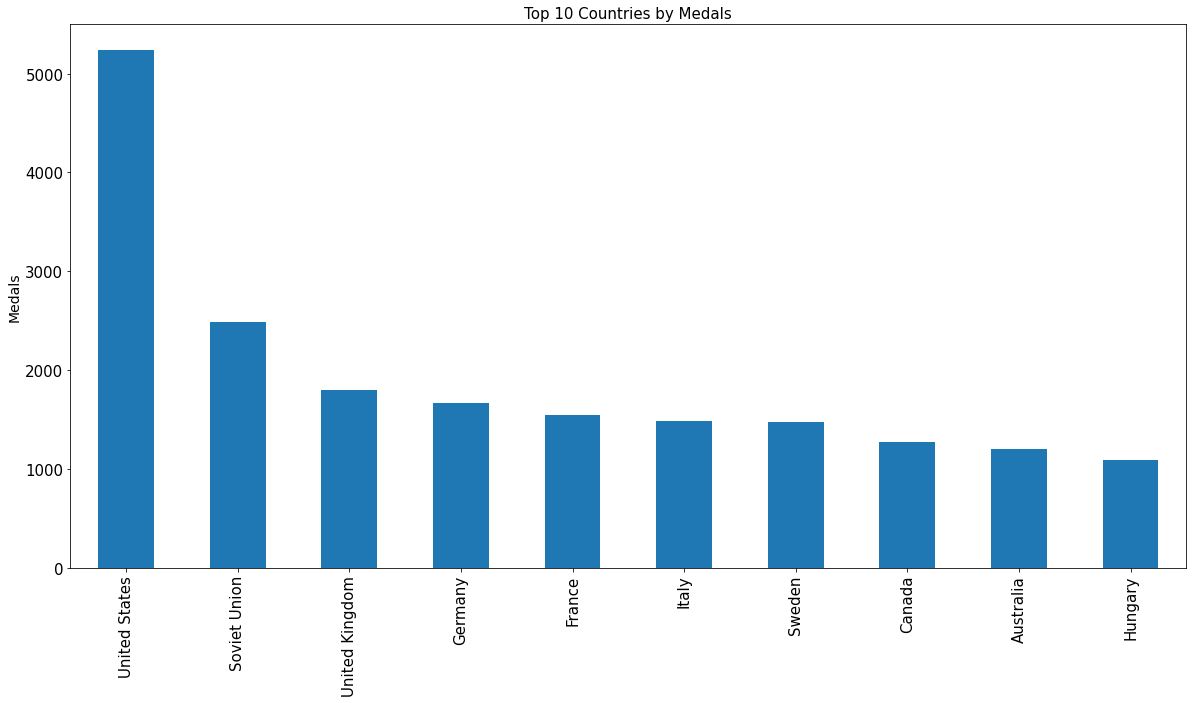

In [109]:
top_10.plot(kind='bar', fontsize=15, figsize=(20,10))
plt.title('Top 10 Countries by Medals', fontsize=15)
plt.ylabel("Medals", fontsize=14)
plt.show()

In [143]:
olympics_10 = olympics[olympics.Country.isin(top_10.index)]

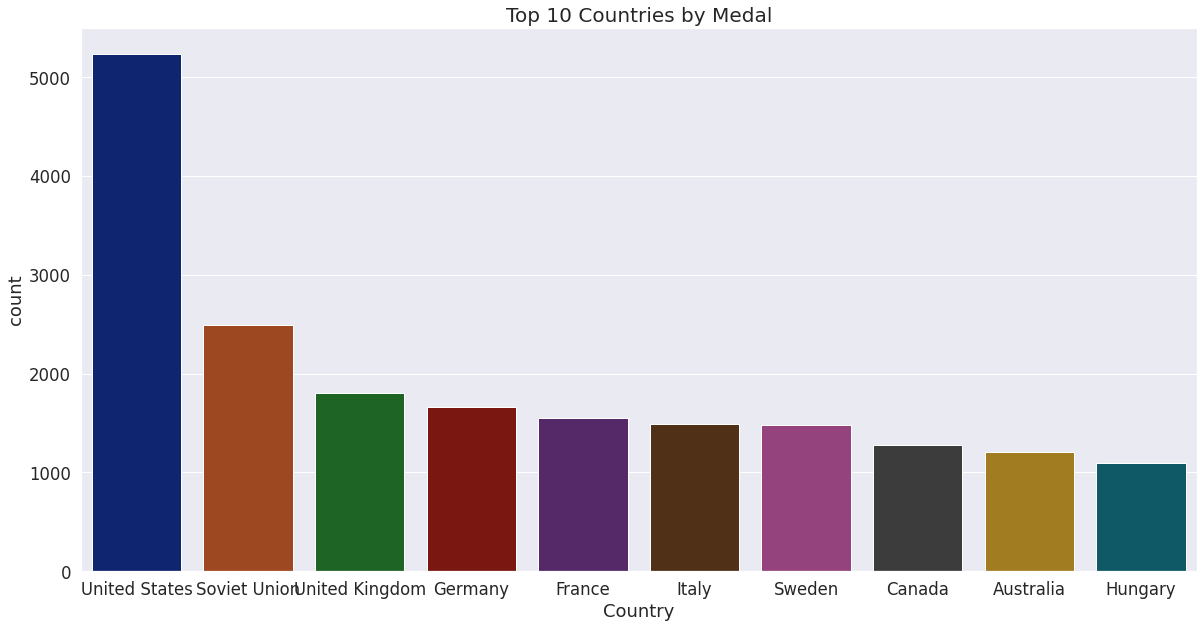

In [187]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette="dark")
sns.countplot(data=olympics_10, x="Country", order=top_10.index)
plt.title("Top 10 Countries by Medal", fontsize=20)
plt.show()


* Differtiate the Medals on the base of the Edition (summer and winter)

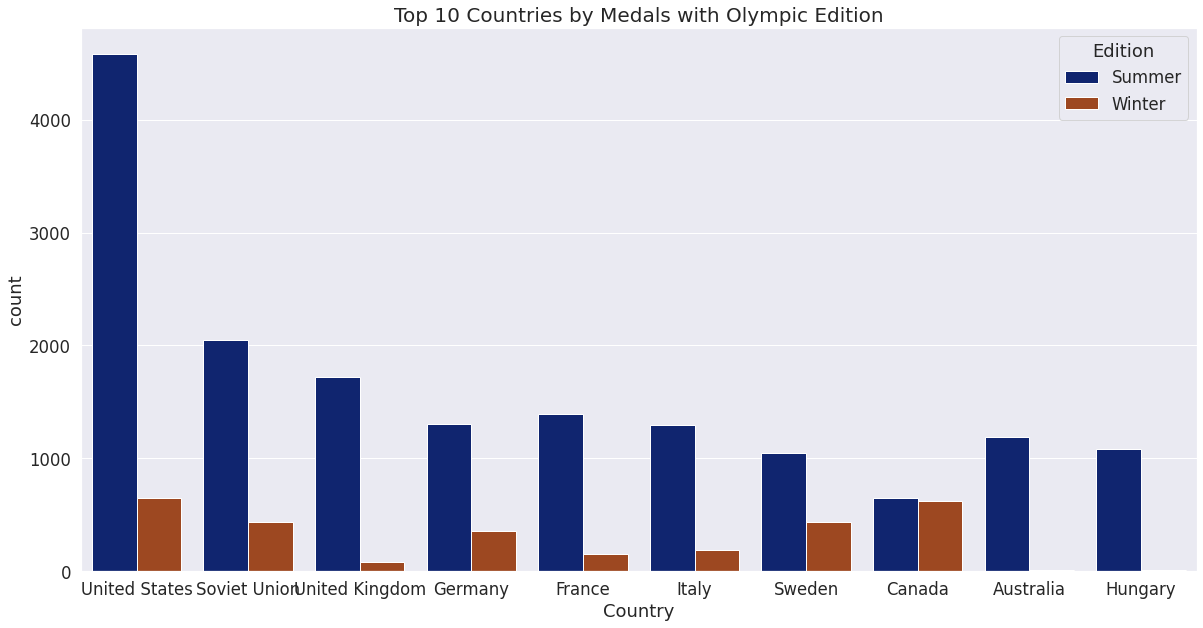

In [190]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Country', hue='Edition', order=top_10.index)
plt.title("Top 10 Countries by Medals with Olympic Edition", fontsize=20)
plt.show()


* saperate summer and winter medals 

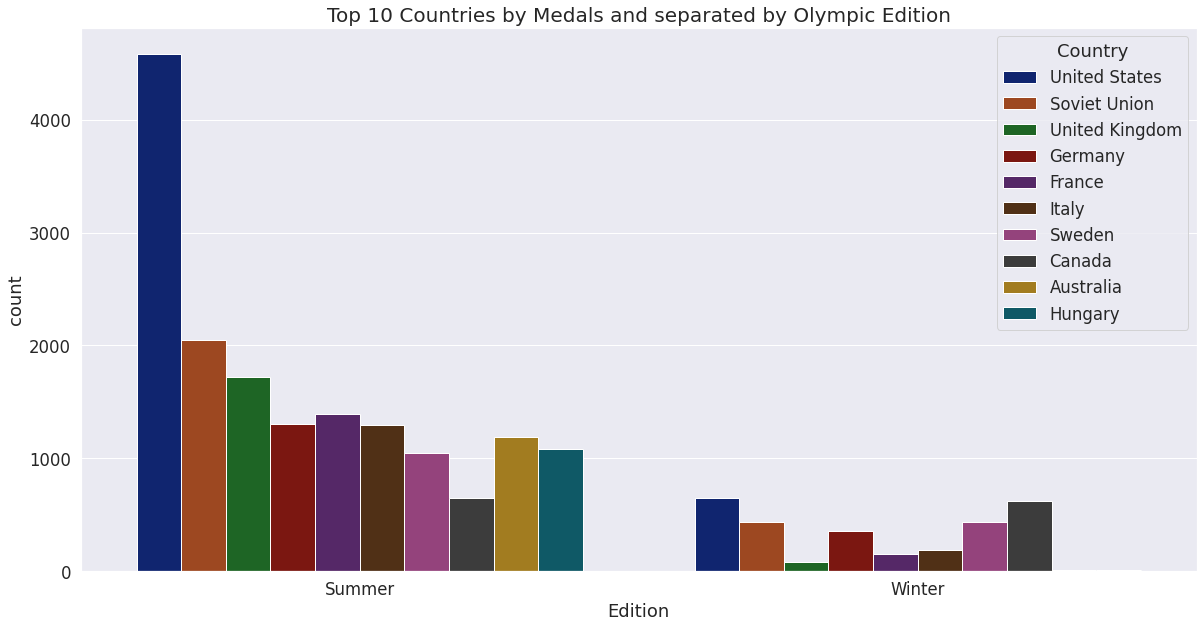

In [203]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Edition', hue='Country', hue_order=top_10.index)
plt.title("Top 10 Countries by Medals and separated by Olympic Edition", fontsize=20)
plt.show()


* countries by separated medal (Gold, Silver, Bronze)

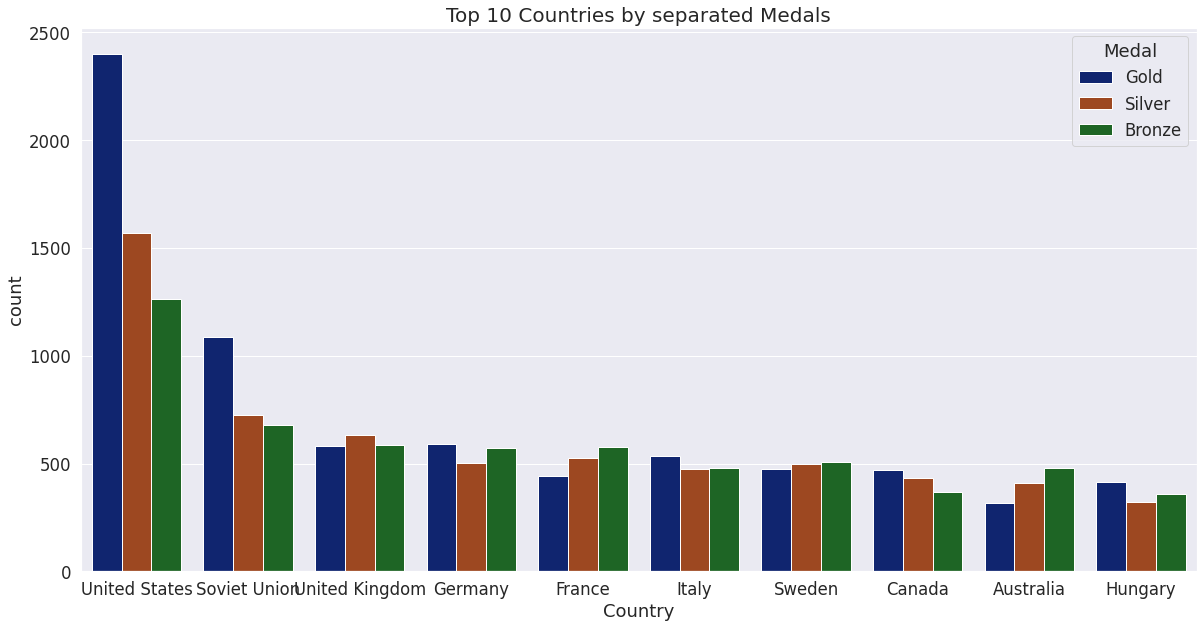

In [209]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Country', hue='Medal',
              order=top_10.index, hue_order=["Gold", "Silver", "Bronze"])
plt.title("Top 10 Countries by separated Medals", fontsize=20)
plt.show()


* Countries separated by medal types

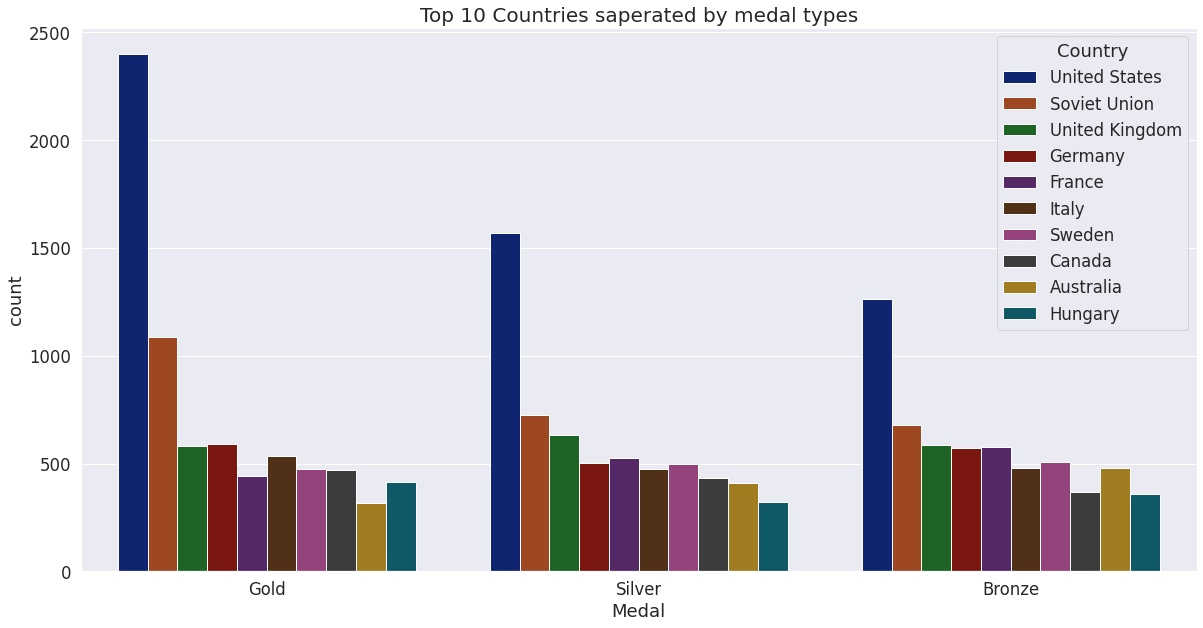

In [211]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette='dark')
sns.countplot(data=olympics_10, x='Medal', hue='Country',
              order=["Gold", "Silver", "Bronze"], hue_order=top_10.index)
plt.title('Top 10 Countries saperated by medal types',fontsize=20)
plt.show()

* checking relation between country's population and winnig

* calculating medals per country

In [252]:
medals_per_country = pd.crosstab(index=olympics.Country, columns=olympics.Medal,
                                 margins=True, margins_name="Total")
medals_per_country.tail(2)

Medal,Bronze,Silver,Gold,Total
Country,,,,
Zimbabwe,1,4,18,23
Total,12288,12238,12405,36931


* removing row `Total` from the dataframe

In [253]:
medals_per_country.drop('Total', axis=0, inplace=True)

In [260]:
medals_per_country.tail(2)

Medal,Bronze,Silver,Gold,Total
Country,,,,
Zambia,1,1,0,2
Zimbabwe,1,4,18,23


* Sorting the dataframe in order to set higher medal values first

In [261]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(
    by=["Total", "Gold", "Silver", "Bronze"], ascending=False)

In [262]:
dic.head(2)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [268]:
medals_per_country = medals_per_country.merge(dic, how='left', right_on="Country", left_index=True).drop(
    columns=["Code"]).set_index("Country")

* joining the city and year to calculate unique games (using year in order to check if one city has organized multiple games)

In [269]:
olympics['Games'] = olympics.apply(lambda x: str(x.Year)+" "+x.City, axis=1)

In [270]:
olympics.head(3)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens


* calculating all the unique games

In [272]:
olympics.Games.nunique()

49

* adding new column `Total_Games` that contains total games participated by the country

In [292]:
medals_per_country["Total_Games"] = olympics.groupby(
    "Country").apply(lambda x: x.Games.nunique())


* Checking the rank of the country in every column

In [293]:
medals_per_country.rank(ascending=False).head()

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0


* Checking the relation between Edition and Atheletes

In [295]:
olympics.head(3)

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens


In [297]:
sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)

In [298]:
men_vs_women = pd.crosstab(olympics.Country, olympics.Gender)

* Joining sum_vs_win and men_vs_women for further analysis

In [299]:
medals_by_category = pd.concat([sum_vs_win,men_vs_women], axis=1)

In [300]:
medals_by_category.head(3)

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72


In [301]:
medals_by_category['Total'] = medals_by_category.Summer +medals_by_category.Winter

In [304]:
medals_by_category.sort_values("Total", ascending=False, inplace=True)

In [305]:
medals_by_category.head(3)


,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799


In [309]:
ranks = medals_by_category.rank(ascending=False)

In [310]:
top_50 = ranks.head(50)


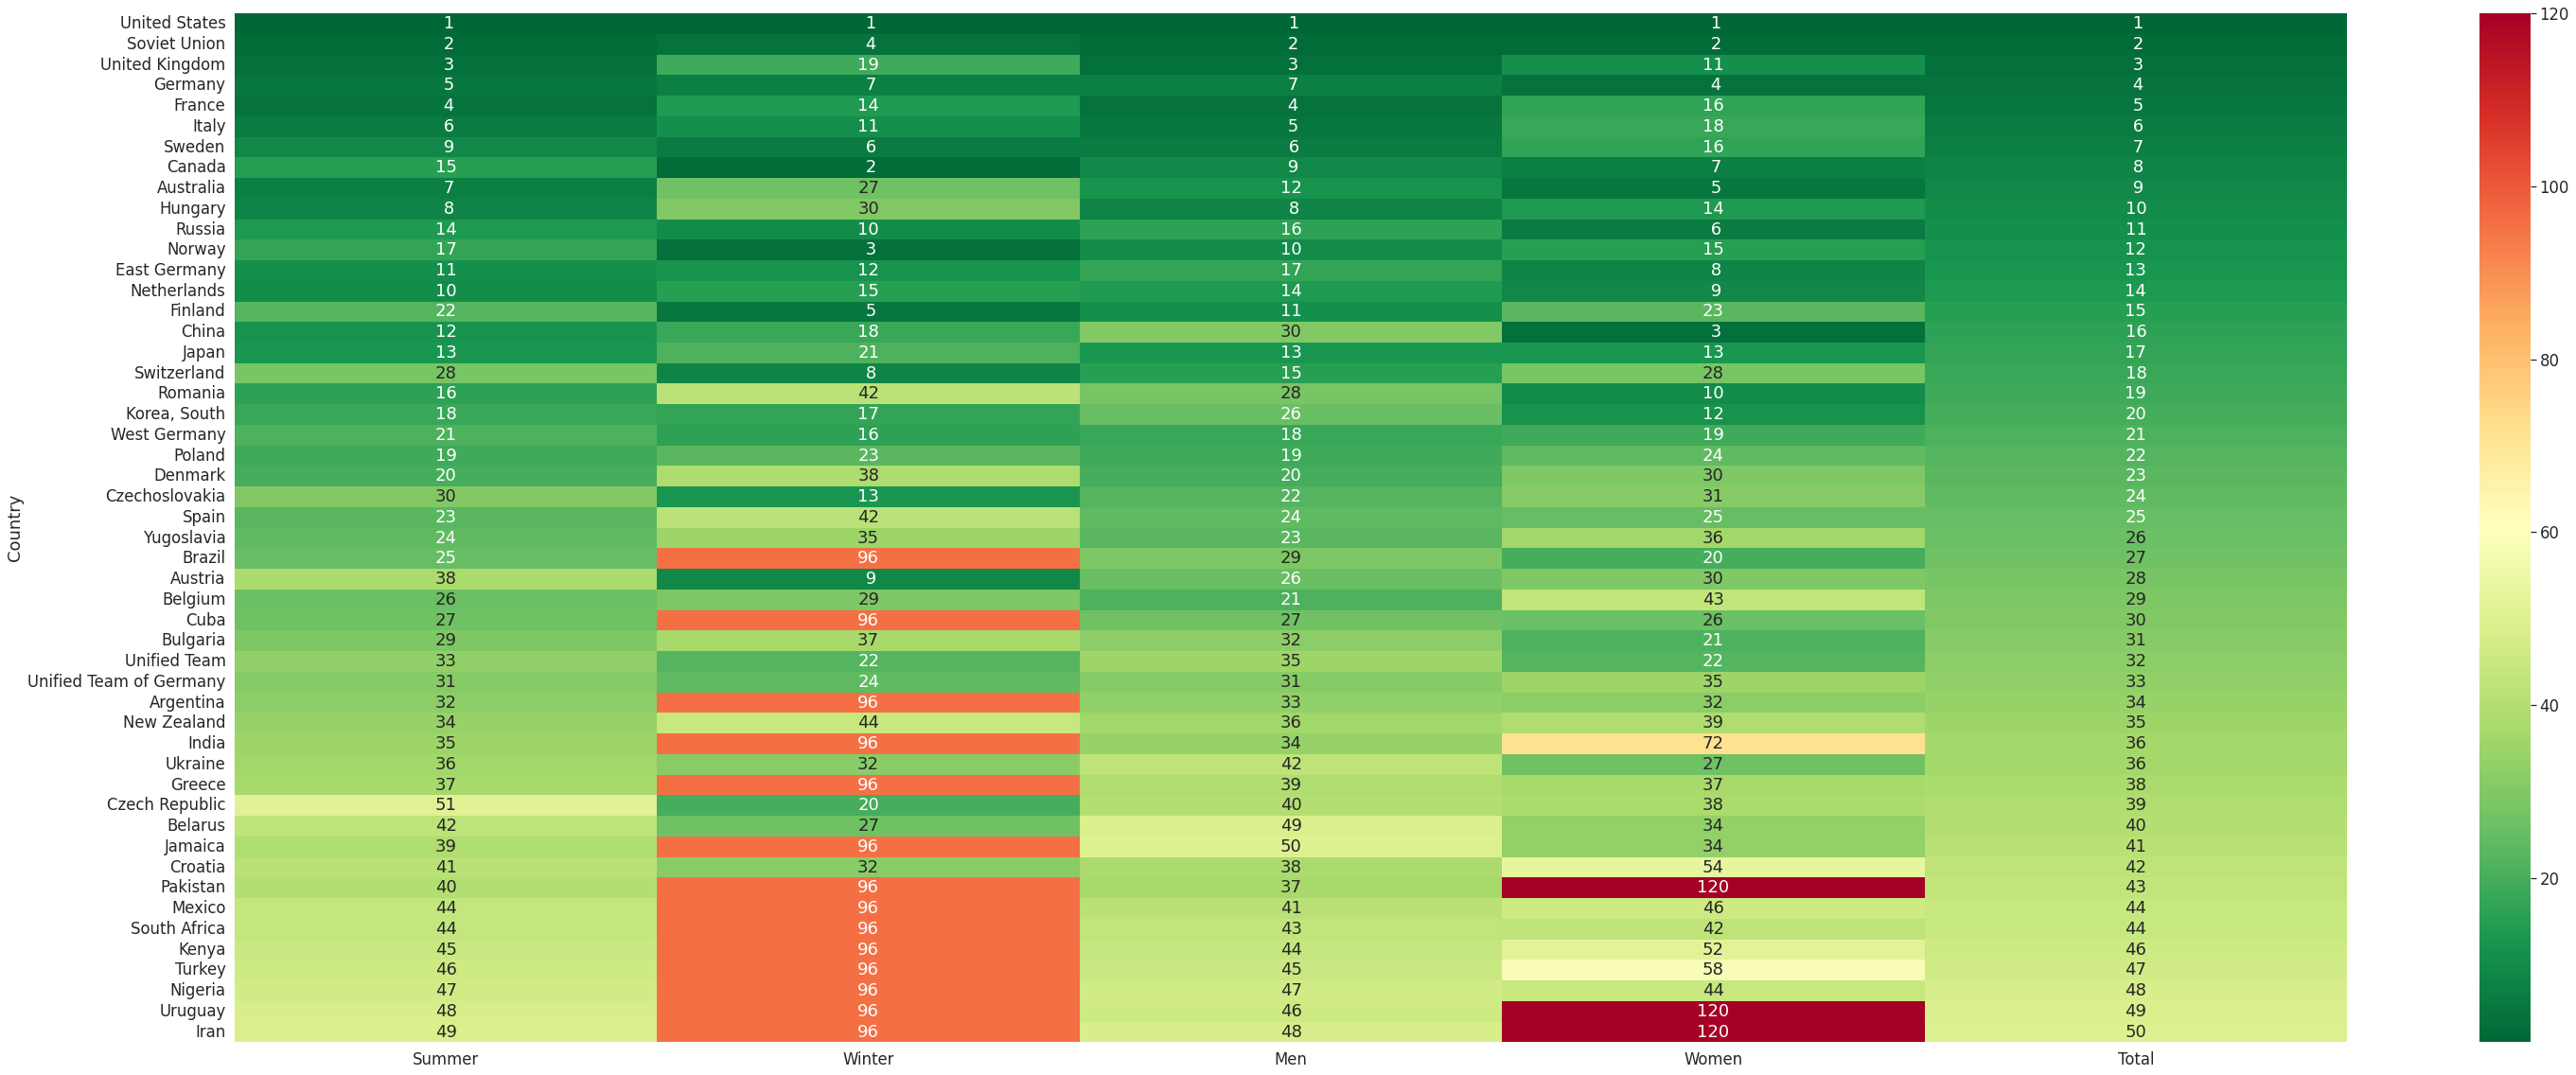

In [313]:
plt.figure(figsize=(50,20))
sns.heatmap(top_50, cmap='RdYlGn_r',annot=True, fmt='2.0f')
plt.show()


* men vs women

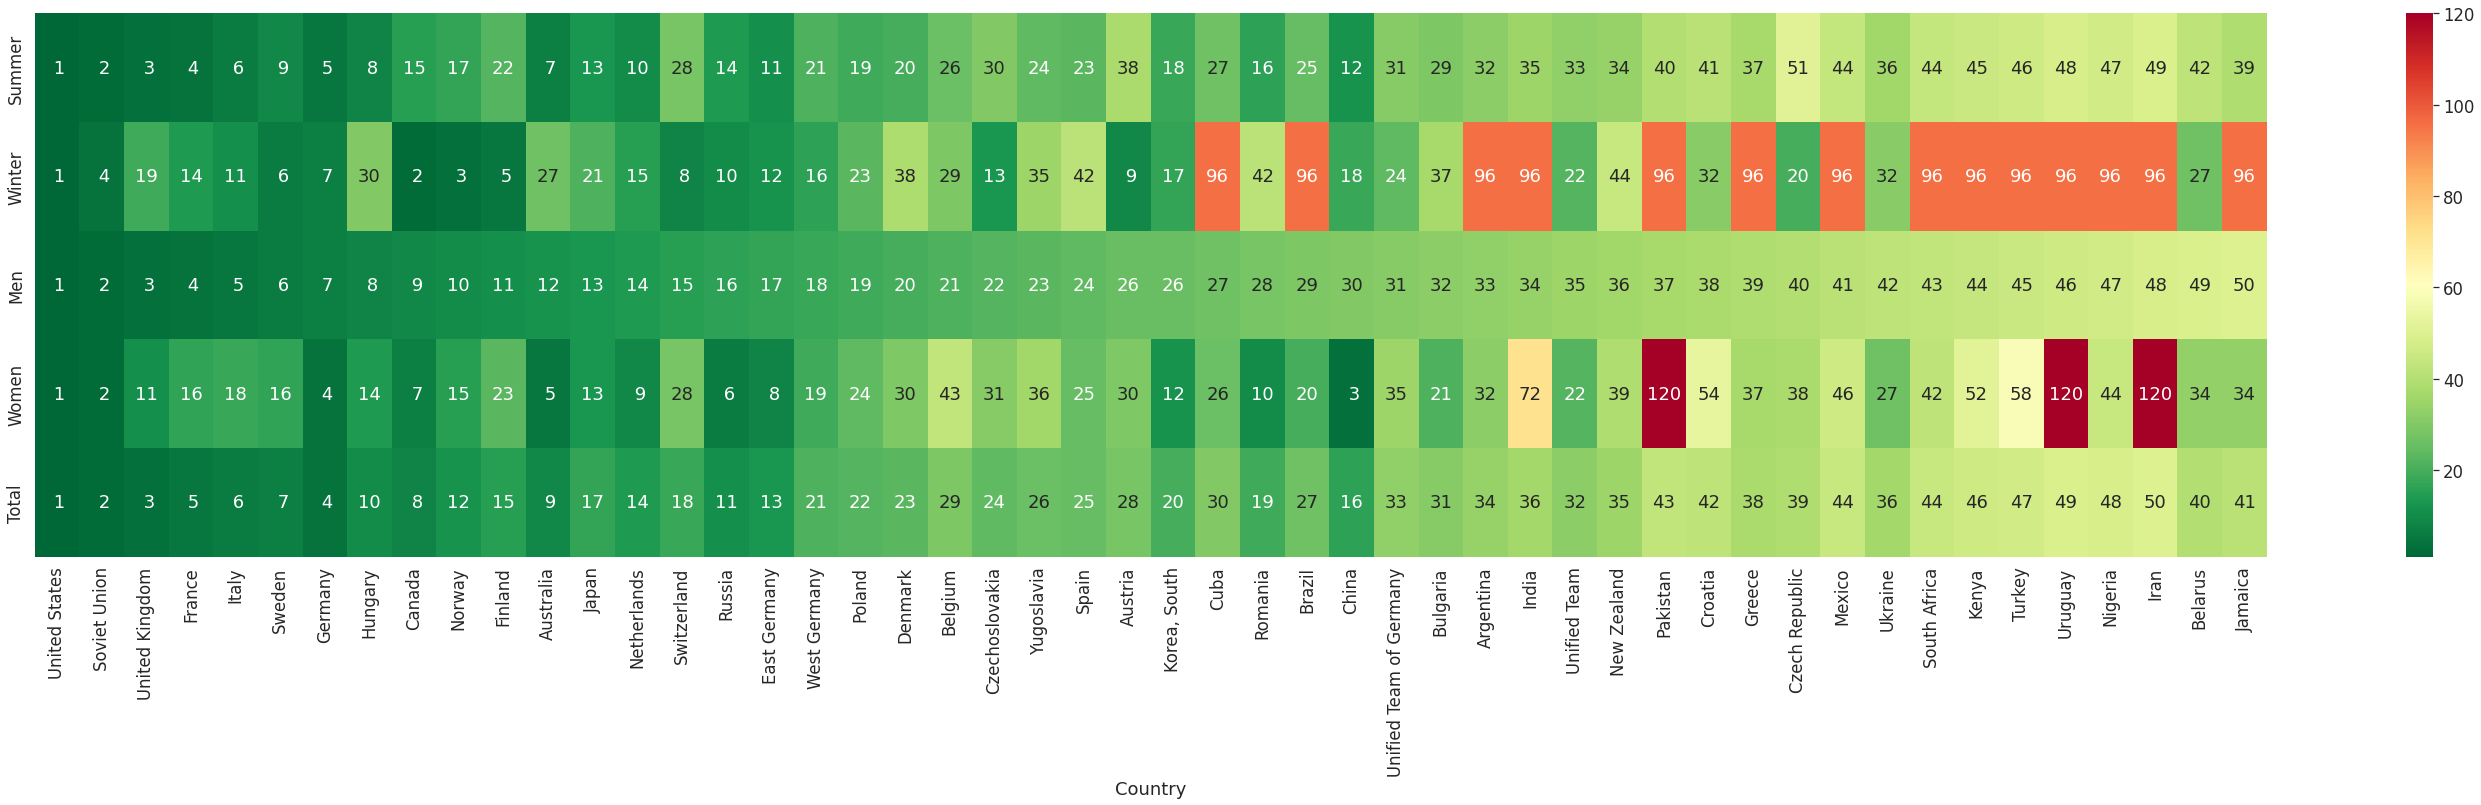

In [317]:
plt.figure(figsize=(50, 10))
sns.heatmap(top_50.sort_values(by="Men").T,
            cmap='RdYlGn_r', annot=True, fmt='2.0f')
plt.show()


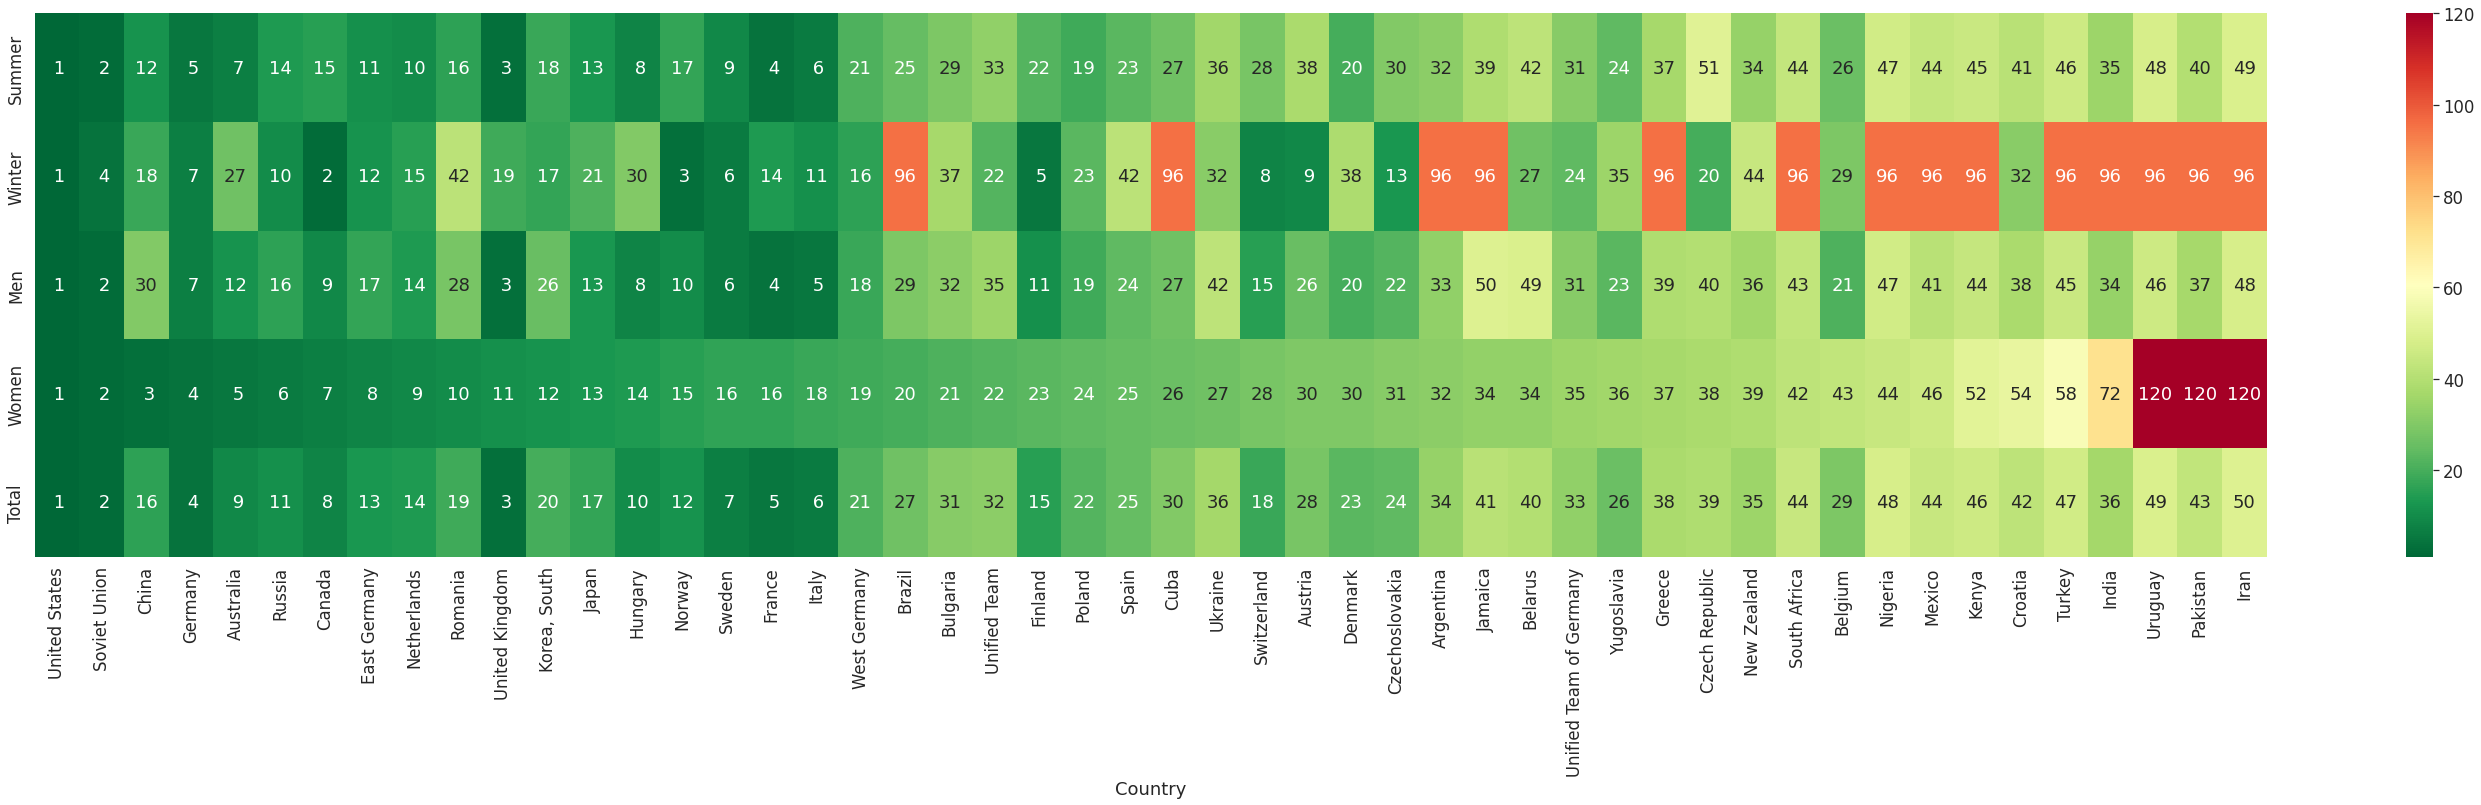

In [318]:
plt.figure(figsize=(50, 10))
sns.heatmap(top_50.sort_values(by="Women").T,
            cmap='RdYlGn_r', annot=True, fmt='2.0f')
plt.show()
